In [1]:
# Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
#Loading the dataset
fad_cile_path=r'C:\Users\samro\OneDrive\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(fad_cile_path)

In [3]:
#Display the data
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Total missing values per column
missing_values = df.isnull().sum()
print("\nMissing Values Before Handling:")
print(missing_values)


Missing Values Before Handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# View first few rows
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [7]:
# Get basic information about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [10]:
# Step 2: Handling Missing values
# Total missing values per column
missing_values = df.isnull().sum()
print("\nMissing Values Before Handling:")
print(missing_values)


Missing Values Before Handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
# Example of handling missing values
# If 'TotalCharges' has missing values, replace with median
if 'TotalCharges' in df.columns:
    # Convert to numeric, forcing errors to NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # Fill missing values and reassign
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [12]:
# Drop rows with missing values if needed
df.dropna(inplace=True)

In [13]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
# Selecting only numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

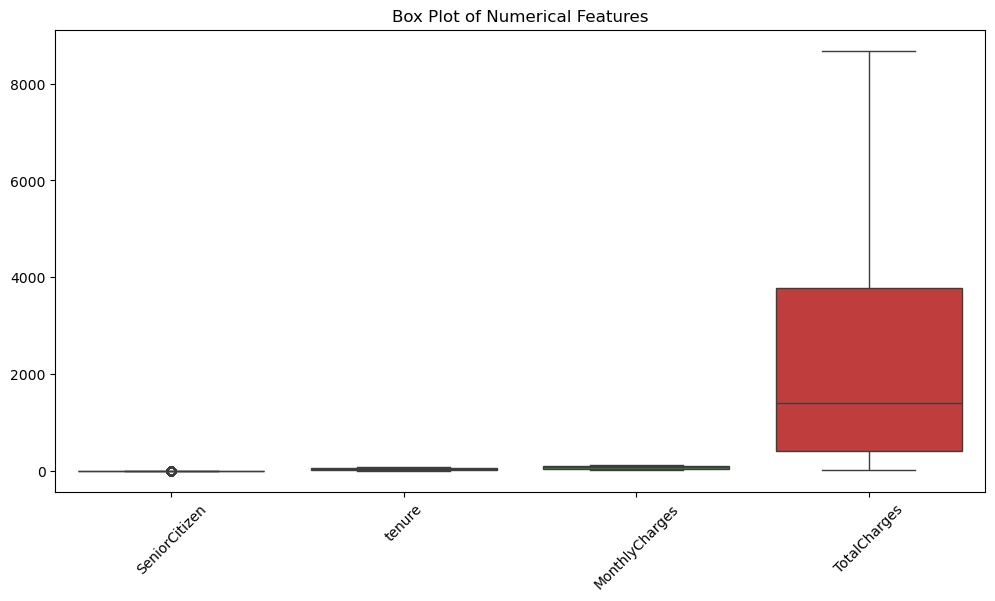

In [18]:
# Visualizing outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_cols)
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

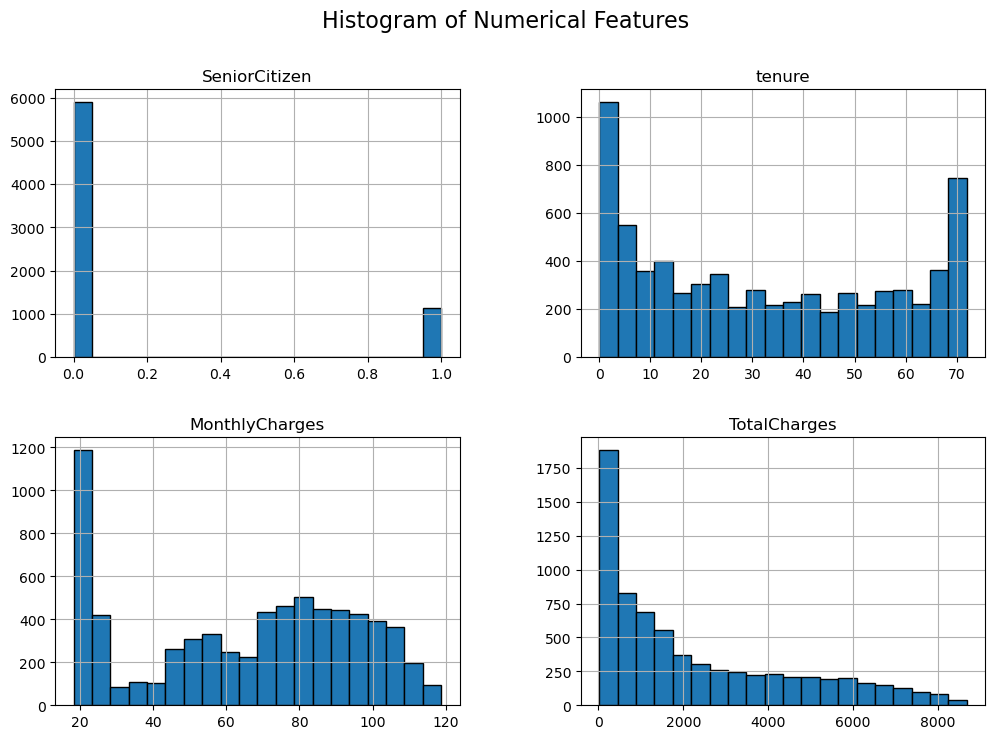

In [19]:
#Histogram of numerical features
plt.figure(figsize=(12, 8))
numerical_cols.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()

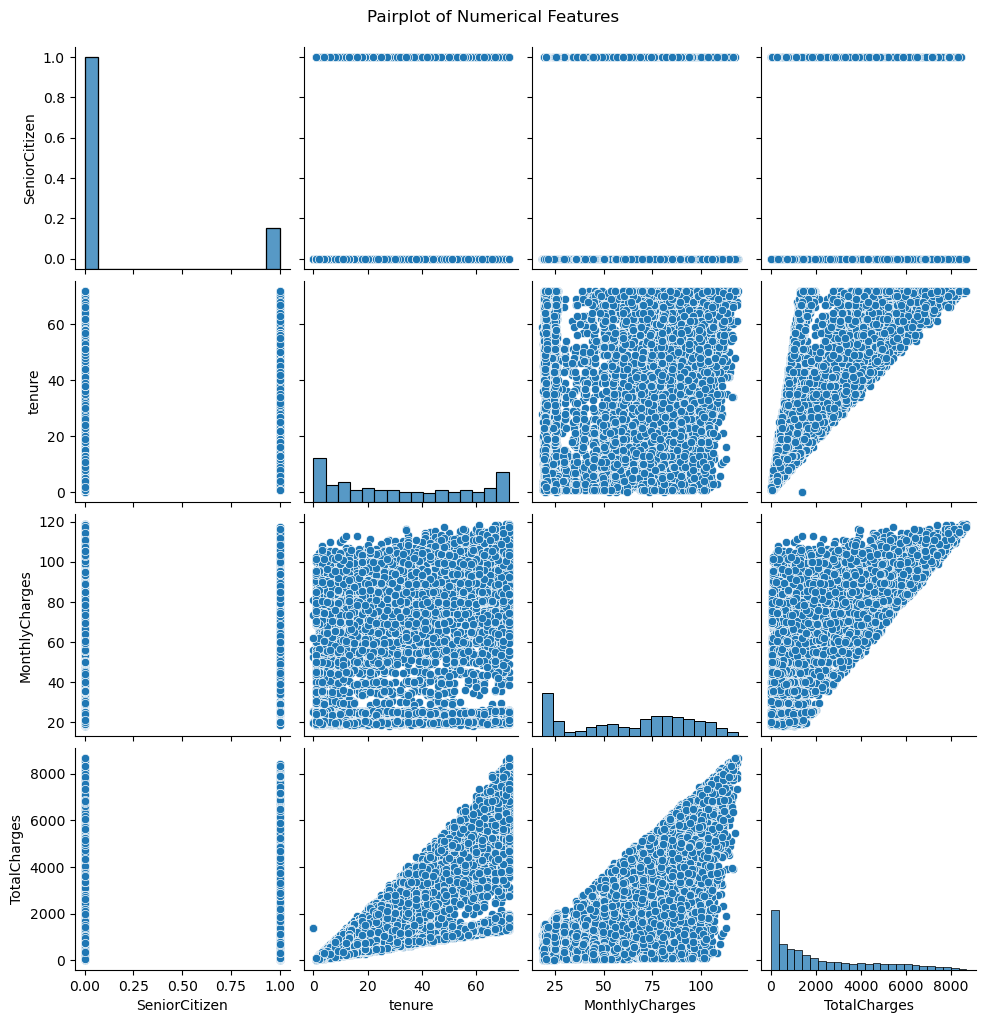

In [20]:
#Pairplot for numerical features
sns.pairplot(numerical_cols)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

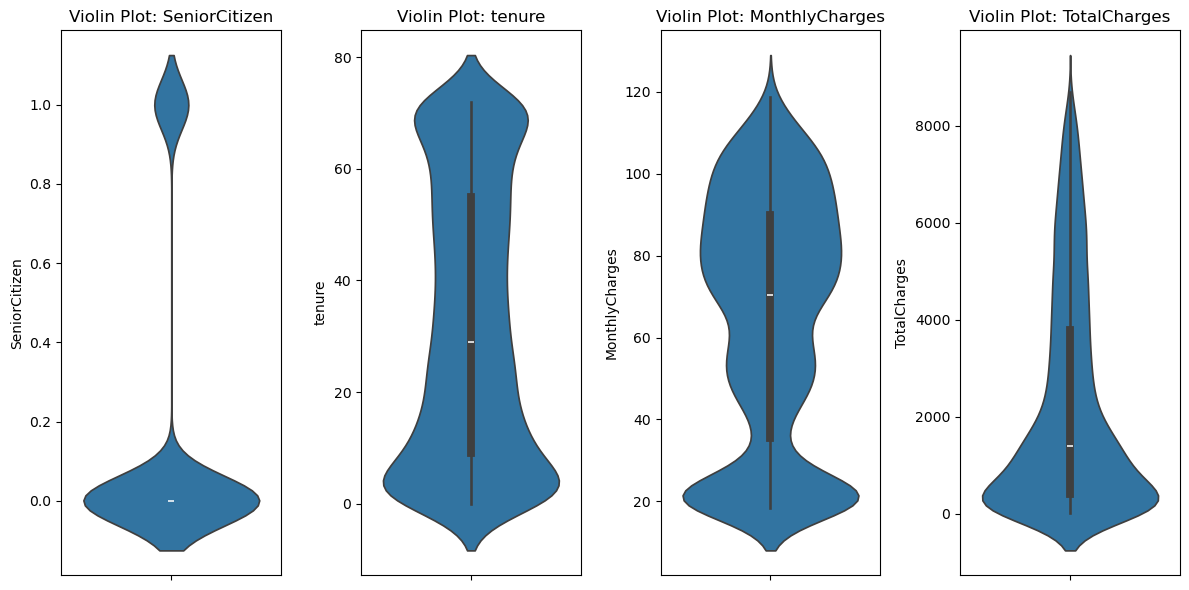

In [21]:
#Violin plot for each numerical feature
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols.columns, 1):
    plt.subplot(1, len(numerical_cols.columns), i)
    sns.violinplot(y=numerical_cols[col])
    plt.title(f"Violin Plot: {col}")
plt.tight_layout()
plt.show()

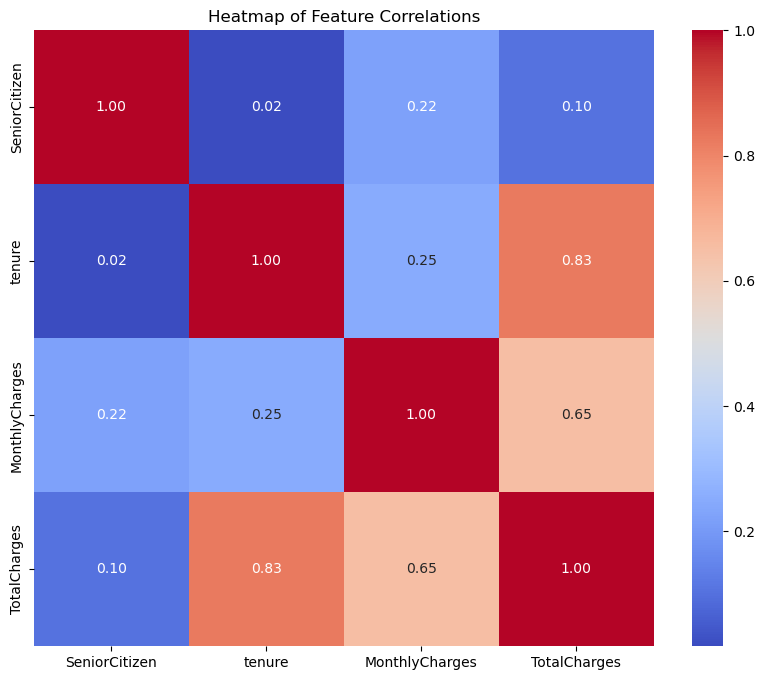

In [22]:
#Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()


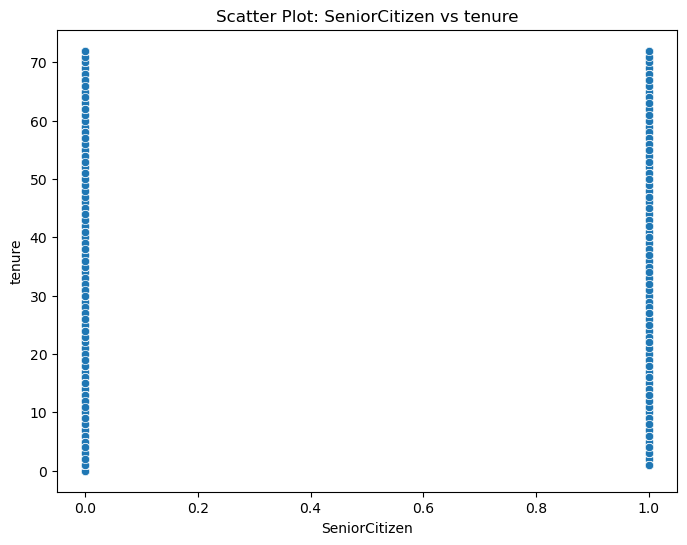

In [23]:
#Scatter plot (first two numerical columns)
if numerical_cols.shape[1] > 1:  # Ensure there are at least two numerical columns
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=numerical_cols.iloc[:, 0], y=numerical_cols.iloc[:, 1])
    plt.title(f"Scatter Plot: {numerical_cols.columns[0]} vs {numerical_cols.columns[1]}")
    plt.xlabel(numerical_cols.columns[0])
    plt.ylabel(numerical_cols.columns[1])
    plt.show()

In [24]:
import pandas as pd
import numpy as np

# Sample data loading (replace with your dataset)
# df = pd.read_csv('customer_data.csv')

# Sample dataset columns (you will replace this with your actual dataset)
df = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'signup_date': ['2022-01-01', '2022-02-15', '2023-03-01', '2022-04-01', '2022-05-01'],
    'last_purchase_date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-01-15', '2023-01-10'],
    'total_spend': [200, 150, 500, 80, 300],
    'transactions': [10, 5, 25, 3, 12],
    'customer_age': [30, 45, 25, 60, 35],
    'gender': ['M', 'F', 'F', 'M', 'M'],
    'churned': [0, 1, 0, 0, 1]  # 0 - active, 1 - churned
})

# Convert 'signup_date' and 'last_purchase_date' to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])

# Feature Engineering

# 1. **Tenure**: The number of days a customer has been with the company
df['tenure'] = (pd.to_datetime('today') - df['signup_date']).dt.days

# 2. **Recency**: The number of days since the last purchase
df['recency'] = (pd.to_datetime('today') - df['last_purchase_date']).dt.days

# 3. **Average Transaction Value**: Total spend divided by the number of transactions
df['avg_transaction_value'] = df['total_spend'] / df['transactions']

# 4. **Is high-value customer**: Identify customers who spent above a certain threshold
df['is_high_value_customer'] = (df['total_spend'] > 250).astype(int)

# 5. **Customer Segmentation by Age**: Categorize customers into age groups
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

# 6. **Gender encoding**: Convert gender to numerical values
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

# 7. **Churn flag**: Add a column showing if the customer has churned (already in the dataset)
# df['churned'] is already available, so no need to create a new one

# 8. **Rolling Average of Spend**: Use a rolling window to calculate the average spend
# (This example assumes 'total_spend' represents monthly data)
df['rolling_avg_spend'] = df['total_spend'].rolling(window=3, min_periods=1).mean()

# 9. **Interaction features**: Combine features to create new ones
df['spend_per_transaction'] = df['total_spend'] / (df['transactions'] + 1)  # Prevent division by zero

# 10. **Time Since Last Activity**: Time difference from the last activity (here, last purchase)
df['time_since_last_activity'] = (pd.to_datetime('today') - df['last_purchase_date']).dt.days

# 11. **Customer Lifetime Value (CLV)**: For simplicity, assume a basic formula for CLV (you can replace with more complex ones)
# Example: CLV = average monthly spend * months since sign-up
df['clv'] = (df['total_spend'] / df['tenure']) * df['tenure'] / 30

# View the engineered features
print(df[['customer_id', 'tenure', 'recency', 'avg_transaction_value', 'is_high_value_customer', 
          'age_group', 'gender', 'rolling_avg_spend', 'spend_per_transaction', 'time_since_last_activity', 'clv', 'churned']])



   customer_id  tenure  recency  avg_transaction_value  \
0            1    1097      732              20.000000   
1            2    1052      701              30.000000   
2            3     673      673              20.000000   
3            4    1007      718              26.666667   
4            5     977      723              25.000000   

   is_high_value_customer    age_group  gender  rolling_avg_spend  \
0                       0        Young       0         200.000000   
1                       0  Middle-aged       1         175.000000   
2                       1        Young       1         283.333333   
3                       0       Senior       0         243.333333   
4                       1  Middle-aged       0         293.333333   

   spend_per_transaction  time_since_last_activity        clv  churned  
0              18.181818                       732   6.666667        0  
1              25.000000                       701   5.000000        1  
2              19

In [27]:
#Model training
# Sample dataset (you can use the dataframe 'df' created in previous steps)
df = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'tenure': [730, 320, 307, 276, 245],
    'recency': [1, 335, 306, 358, 367],
    'avg_transaction_value': [20.0, 30.0, 20.0, 26.67, 25.0],
    'is_high_value_customer': [0, 0, 1, 0, 0],
    'age_group': ['Young', 'Middle-aged', 'Young', 'Senior', 'Young'],
    'gender': [0, 1, 1, 0, 0],
    'rolling_avg_spend': [200.0, 150.0, 500.0, 80.0, 300.0],
    'spend_per_transaction': [20.0, 30.0, 20.0, 26.67, 25.0],
    'time_since_last_activity': [1, 335, 306, 358, 367],
    'clv': [200.0, 150.0, 500.0, 80.0, 300.0],
    'churned': [0, 1, 0, 0, 1]  # Target variable (0 = active, 1 = churned)
}) 

In [28]:
# Convert categorical 'age_group' to dummy variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

In [29]:
# Define the features (X) and target (y)
X = df.drop(columns=['customer_id', 'churned'])  # Drop customer_id and target column
y = df['churned']  # Target variable (0 = active, 1 = churned)

In [31]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling (Standardize the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [33]:
from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
# Model Training: Logistic Regression
from sklearn.linear_model import LogisticRegression

# Model Training: Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [36]:
# Predictions on test set
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
print(np.unique(y_test))



              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       1.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0

[1]


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate R-Squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 1.0000
Mean Absolute Error (MAE): 1.0000
R-Squared (R²): nan


C:\Users\samro\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
